# Activity 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import Ridge

## a) y_data vs x_data for different size of data sets, N = 10, 100, 1000
data = signal + noise. Here, signal = $\sin(2\pi x)$ and noise = normal distribution with sigma = $0.3$

In [70]:
def data(N):
    x1 = np.random.uniform(size=N)
    f = np.sin(2*np.pi*x1) + np.random.normal(loc=0, scale=0.3, size=N)
    return x1, f

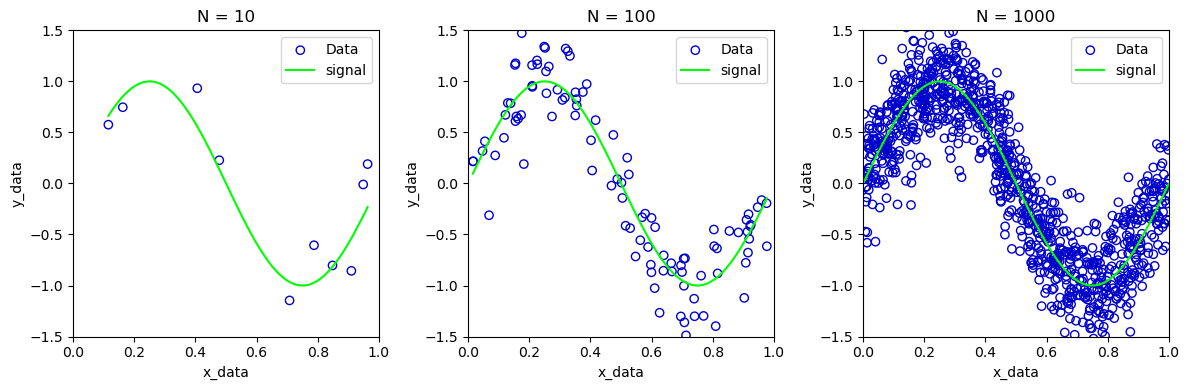

In [93]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4)) 
N = [10, 100, 1000] #number of data points

for i, element in enumerate(N): 
    x_data, y_data = data(element)
    x_continuous = np.linspace(x_data.min(), x_data.max(), 100)
    axs[i].scatter(x_data, y_data, facecolors='none', edgecolors='mediumblue', marker='o', label='Data')
    axs[i].plot(x_continuous, np.sin(2*np.pi*x_continuous),c='lime', label='signal')
    axs[i].legend()
    axs[i].set_title(f'N = {element}')
    axs[i].set_xlabel('x_data')
    axs[i].set_ylabel('y_data')
    axs[i].set_xlim([0,1])
    axs[i].set_ylim([-1.5, 1.5])

plt.tight_layout()
plt.show()

## b) y_data vs x_data together with polynomial fit
## Analysis - a

In [74]:
def polynomial(x, poly):
    result = 0
    for coeff in poly:
        result = x * result + coeff
    return result

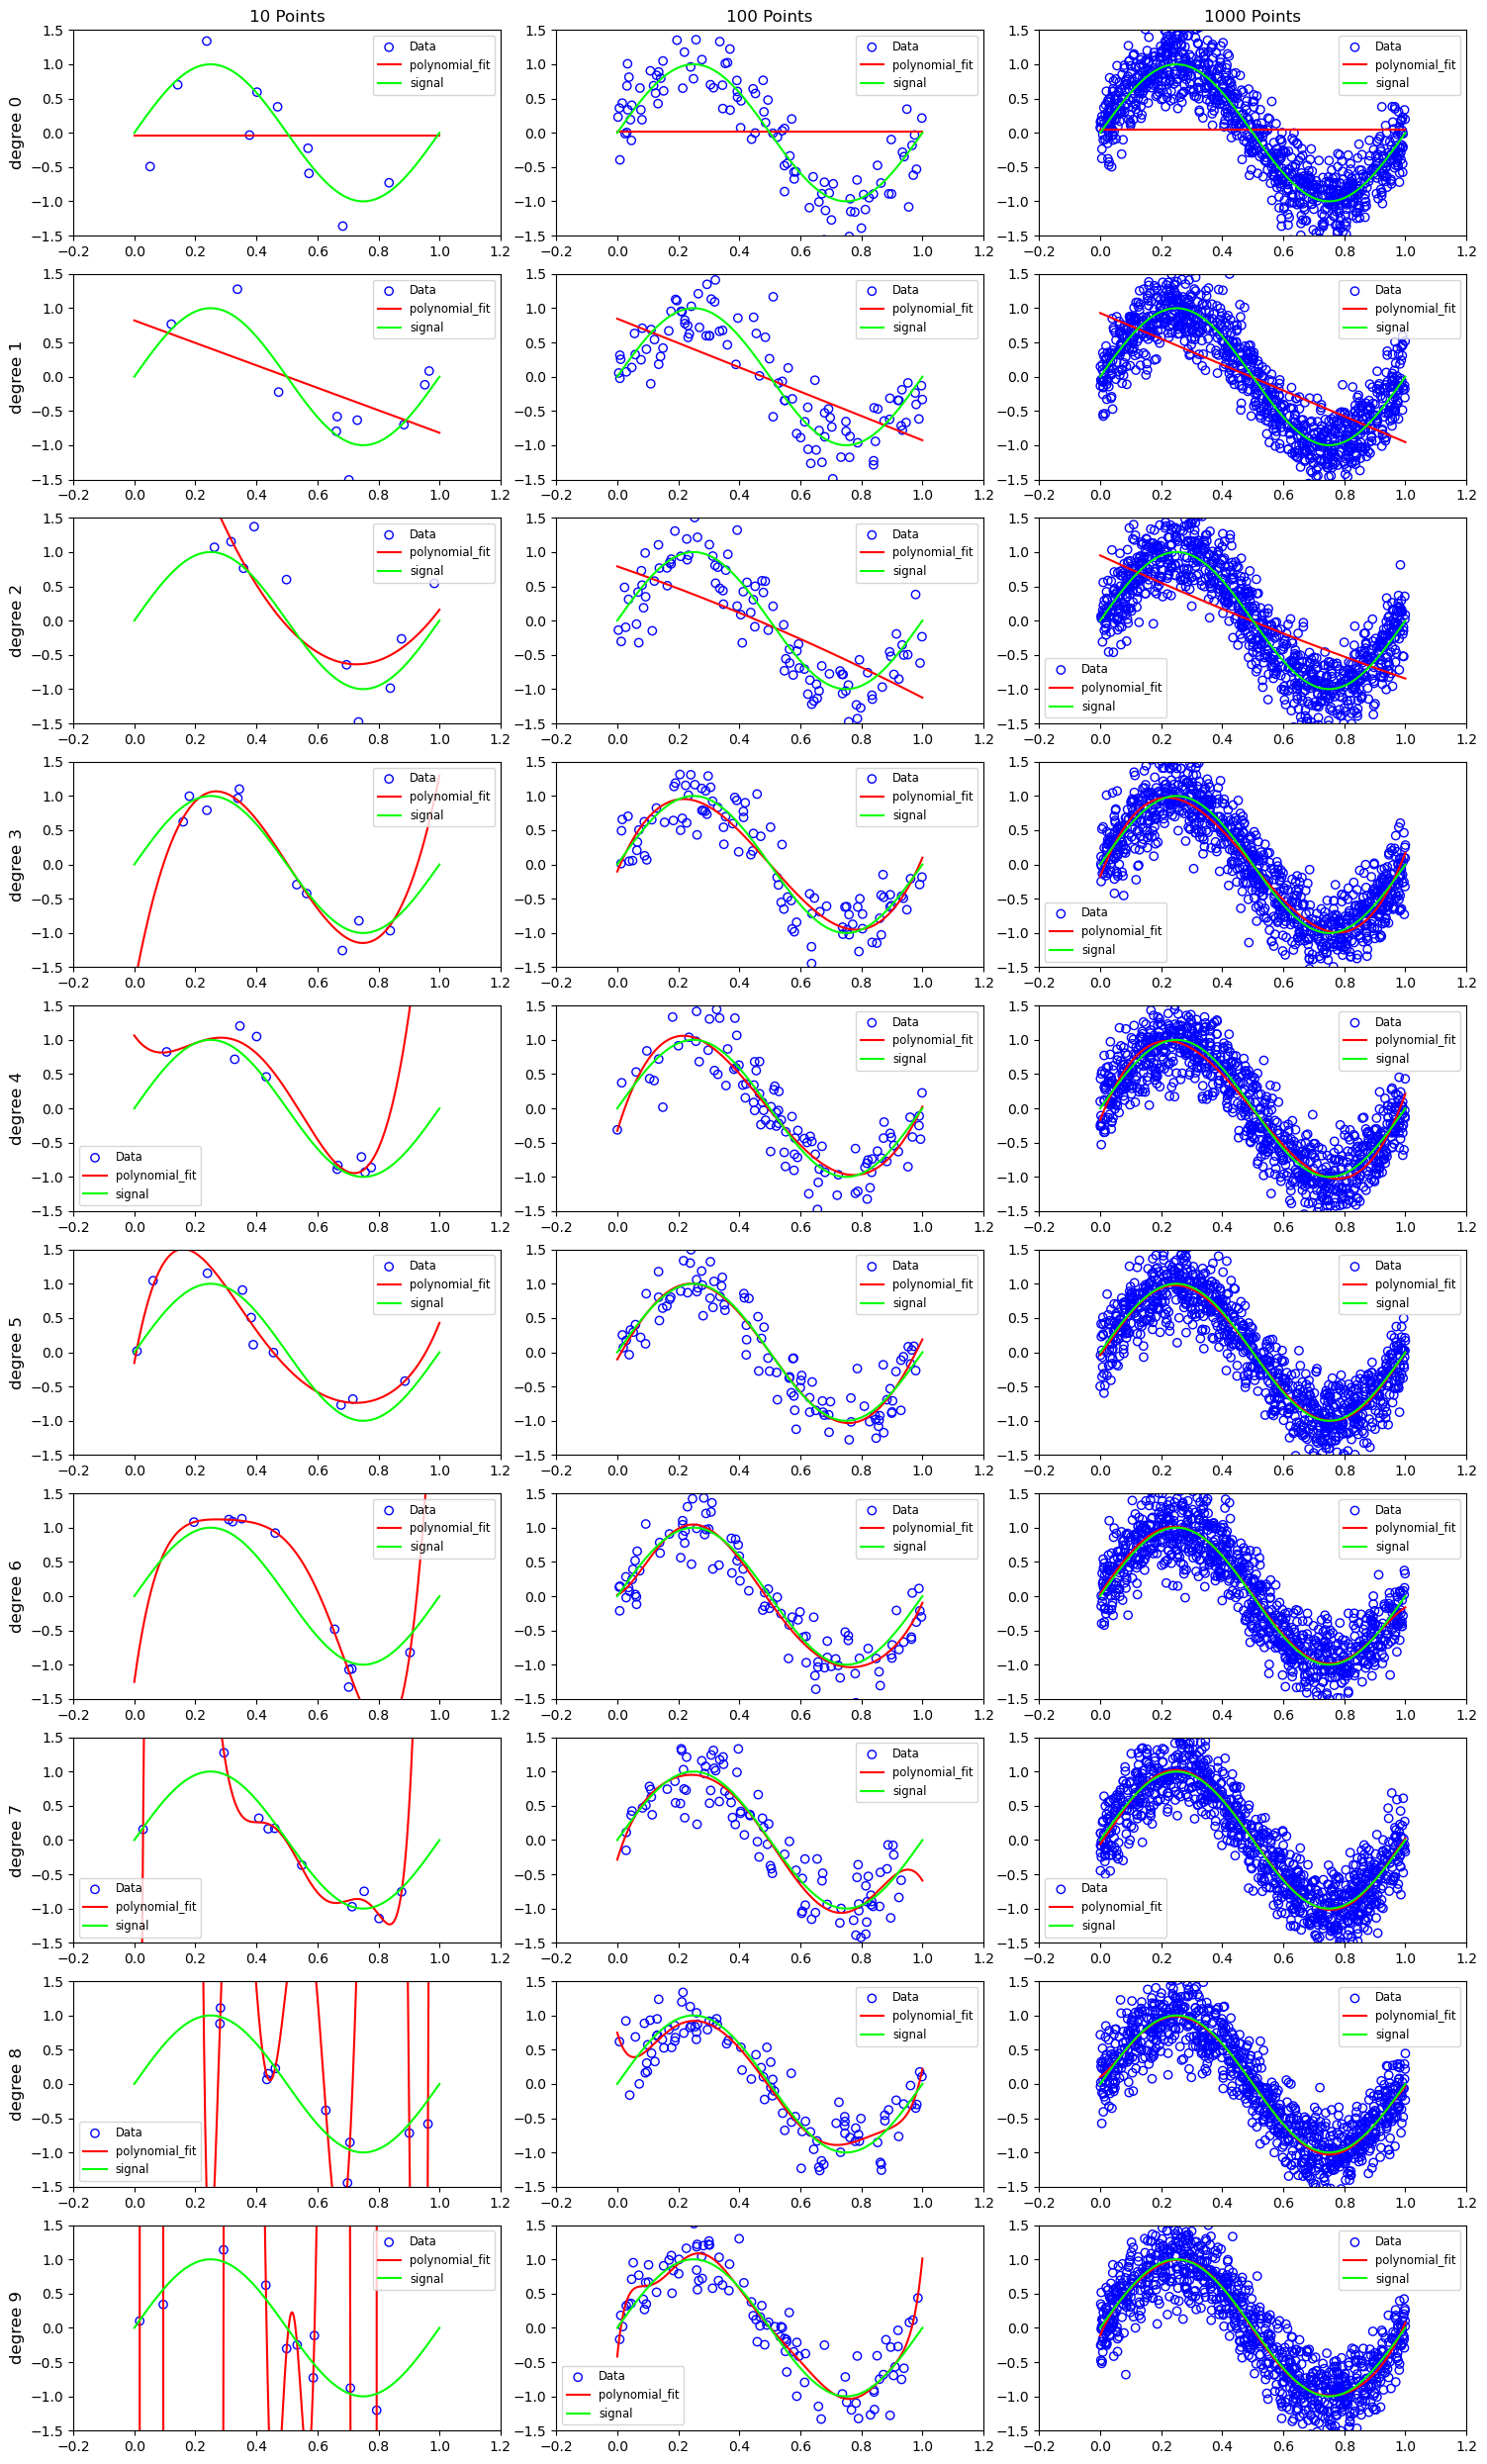

In [83]:
order = np.arange(0,10)
N = [10, 100, 1000]
fig, axs = plt.subplots(len(order), len(N), figsize=(15, 25))

for i, deg in enumerate(order):  # Enumerate over the degree array
    for j, n in enumerate(N):
        x_data, y_data = data(n)
        c = np.polyfit(x_data, y_data, deg)
        x_continuous = np.linspace(0, 1, 500)
        axs[i, j].scatter(x_data, y_data, facecolors='none', edgecolors='blue', marker='o', label='Data')
        axs[i, j].plot(x_continuous, polynomial(x_continuous, c), c='red', label='polynomial_fit')
        axs[i, j].plot(x_continuous, np.sin(2*np.pi*x_continuous), c='lime', label='signal')
        #axs[i, j].set_title(f'N = {element}')
        #axs[i, j].set_xlabel('x_data')
        #axs[i, j].set_ylabel('t(target variable)')
        if i == 0:
            axs[i, j].set_title(f"{n} Points", fontsize=12)
        if j == 0:
            axs[i, j].set_ylabel(f"degree {deg}", fontsize=12)
        axs[i, j].legend(fontsize='small', loc='best')
        axs[i, j].set_xlim([-0.2, 1.2])
        axs[i, j].set_ylim([-1.5, 1.5])
        axs[i, j].legend(fontsize='small', loc='best')
        
plt.tight_layout()
plt.show()

## Analysis - b

In [79]:
def deviation(x, y, coeffs):
    return (polynomial(x, coeffs) - y)**2

def E_rms(x, y, coeffs):
    return (np.sum(deviation(x, y, coeffs))/len(x))**0.5

N = [10, 100, 1000]
order = 9

for i, element in enumerate(N):
    x_data, y_data = data(element)
    c = np.polyfit(x_data, y_data, order)
    Error_rms = E_rms(x_data, y_data, c)
    print("E_rms(N =",element,") = ", Error_rms)

E_rms(N = 10 ) =  3.8570718006782535e-08
E_rms(N = 100 ) =  0.3450156557229712
E_rms(N = 1000 ) =  0.3002200542896105


## Analysis - c

In [91]:
N = 100
order = np.arange(0,10)
x_data, y_data = data(N)
x_train = x_data[75:]
y_train = y_data[75:]
x_test = x_data[:25]
y_test = y_data[:25]
train_rms = np.array([])
test_rms = np.array([])

for i, element in enumerate(order):
    c = np.polyfit(x_data, y_data, element)
    Error_rms_train = E_rms(x_train, y_train, c)
    Error_rms_test = E_rms(x_test, y_test, c)
    #print("E_rms_training(M =",element,") : ", Error_rms_train)
    #print("E_rms_test(M =",element,") : ", Error_rms_test)
    train_rms = np.append(train_rms, Error_rms_train)
    test_rms = np.append(test_rms, Error_rms_test)

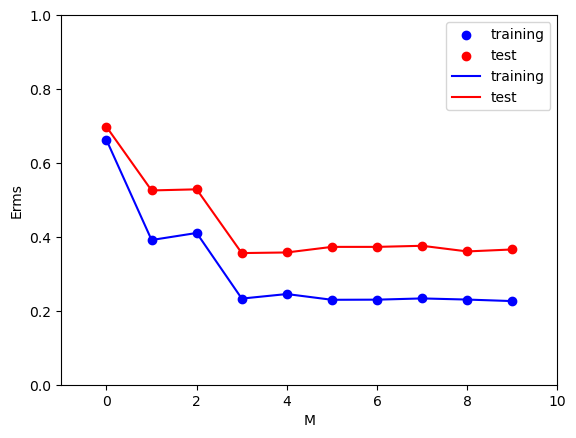

In [95]:
plt.scatter(order, train_rms, marker='o', c="blue", label="training")
plt.scatter(order, test_rms, marker='o', c='red', label='test')

plt.plot(order, train_rms, color="blue", linestyle='-', label='training')
plt.plot(order, test_rms, color="red", linestyle='-', label='test')

plt.xlim(-1, 10)
plt.ylim(0, 1)
plt.xlabel('M')
plt.ylabel('Erms')
plt.legend()
plt.show()